In [12]:
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw
from openslide import OpenSlide
from matplotlib import pyplot as plt

In [13]:
# read annotation
csvobj = pd.read_pickle('1C1.pkl')
# read image size
impth = r'\\fatherserverdw\Q\research\images\CLUE\3D study\he\c1\1C1.ndpi'
imageobj = OpenSlide(impth)
image_size = imageobj.dimensions
(width,height) = image_size
img = Image.new('L', (width, height), 0) #0 for default pixel value
# convert annotation to binary mask

# edit this function in a way
# write each annotation with pixel value equal to their class ID

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


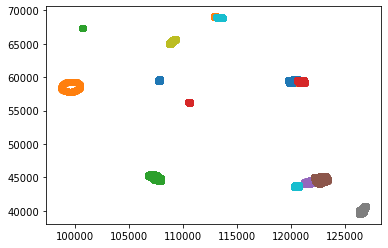

In [14]:

for index, row in csvobj.iterrows(): #iterate through each annotation circle\
    print(index)
    color = (int)(row['Class ID'])
    #try to close the polygon by appending the first coordinate to the end

    xycoord = np.squeeze(row['Coord'].astype('uint32'))

    plt.scatter(xycoord[:,0],xycoord[:,1])

    #plt.savefig('ok')

    xycoord = list(zip(xycoord[:,0],xycoord[:,1])) #turn [[,]] into tuples (,)


    ImageDraw.Draw(img).polygon(xycoord, outline=255, fill=color) #this fill value should be class ID





In [15]:

img2 = img.resize((round(width/10),round(height/10)))
dstfn = '1C1temp.png'
img2.save(dstfn)